## Creating data to view and fit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
sns.set()

In [2]:
tf.__version__

'2.9.2'

In [3]:
# Create a feature
u = np.array([-7, -4, -1, 2, 5, 8, 11, 14], dtype=np.float32)

# Create labels
v = np.array([3, 6, 9, 12, 15, 18, 21, 24], dtype=np.float32)

In [4]:
print(u,v)
print(u.shape, v.shape)

[-7. -4. -1.  2.  5.  8. 11. 14.] [ 3.  6.  9. 12. 15. 18. 21. 24.]
(8,) (8,)


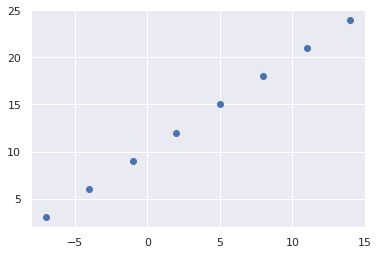

In [5]:
# Visualize it
sns.scatterplot()
plt.scatter(u,v)

In [6]:
# Turn our Numpy array into tensors
U = tf.constant(u)
V = tf.constant(v)

In [7]:
# Checking shape
input_shape = U.shape
output_shape = V.shape

input_shape, output_shape 

(TensorShape([8]), TensorShape([8]))

## Steps in modelling with tensorflow

1.Creating a model

2.Compiling the model

3.Fitting the model

In [8]:
# Set random seed
tf.random.set_seed(42)

# Create a model using Sequential API
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1)]
)

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Fit the model
model.fit(tf.expand_dims(U, axis=-1), V, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 448ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [9]:
# Prediction
pred = model.predict([17])
pred

1/1 [==============================] - 0s 77ms/step


array([[12.716021]], dtype=float32)

In [10]:
pred + 11

array([[23.71602]], dtype=float32)

## Improving the model

We can improve our model, by altering the steps we took to create a model.

  **Creating a model** - Here, we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.

  **Compiling a model** - Here, we might change the optimization function or perhaps the learning rate of the optimization function.

  **Fitting a model** - Here, we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [11]:
# Let's rebuild our model

# Create a model
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1)]
    )

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ['mae'])

# Fit the model
model.fit(tf.expand_dims(U, axis=-1), V, epochs=100, verbose=0);

In [12]:
# Let's see model's prediction
model.predict([17.0])

1/1 [==============================] - 0s 40ms/step


array([[29.064844]], dtype=float32)

In [13]:
# Let's rebuild our model

# Create a model
model = tf.keras.Sequential(
    [ tf.keras.layers.Dense(10, activation=None),
      tf.keras.layers.Dense(1)]
    )

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics = ['mae'])

# Fit the model
model.fit(tf.expand_dims(U, axis=-1), V, epochs=100, verbose=0);

In [14]:
model.predict([17])

1/1 [==============================] - 0s 46ms/step


array([[28.712063]], dtype=float32)

<h3 style="color:Red" > Common ways to improve the model </h3>

> Adding more layers

> Increase the number of hidden units (neurons)

> Change the activation functions

> Change the optimization functions

> Hyper-parameter tuning 

> Fitting for longer


## Evaluvating the model

In [15]:
# Let's make a bigger model
X = tf.range(-100, 100, 4)
#X = X[:, tf.newaxis]

In [16]:
# Make Labels for the data
y = X + 10
#y = y[:, tf.newaxis]

In [17]:
print(X.shape)

(50,)


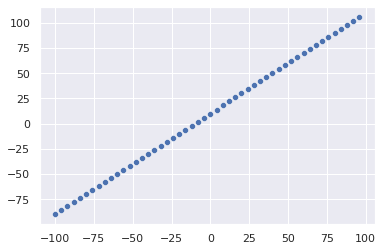

In [18]:
# Let's visualize the model
sns.scatterplot(x=X, y=y) 

In [19]:
# Splitting the data into training and test sets
X_train = X[:40]
y_train = y[:40,]

X_test = X[40:]
y_test = y[40:]

print(len(X_train), len(X_test))

40 10


## Visualizing the data

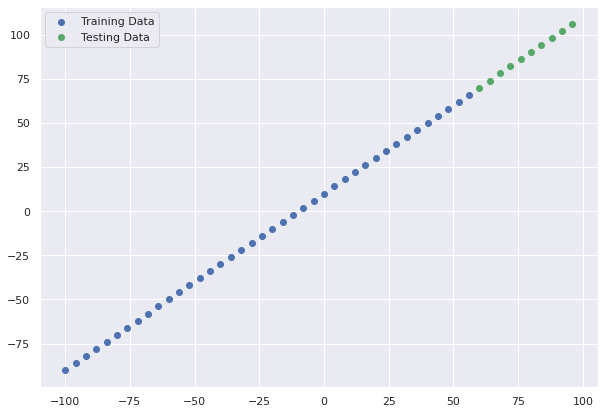

In [20]:
# visualizing training and test data
plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train, c='b', label='Training Data')

plt.scatter(X_test, y_test, c='g', label='Testing Data')

plt.legend();

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.



In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42)

In [23]:
len(X), len(y)

(50, 50)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                20        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Trainable & Non-Trainable Parameters

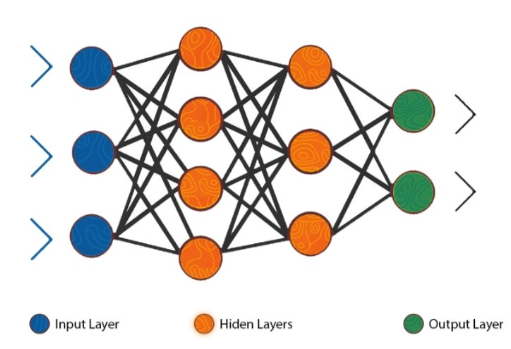

<h3> Trainable Parameters Between the Input layer and First Hidden Layer: </h3>

weights = 3 * 4 = 12

biases = 4 (4 nodes in 1st hidden layer)

<b style='color:green'> Trainable Parameters = weights + biases </b>

= 12 + 4

= 16

<h3> <b> Non-Trainable Parameters </b> </h3>

In keras, non-trainable parameters (as shown in model.summary()) means the number of weights that are not updated during training with backpropagation.

<b> There are mainly two types of non-trainable weights: </b>


 > The ones that you have chosen to keep constant when training. This means that keras won't update these weights during training at all.

> The ones that work like statistics in BatchNormalization layers. They're updated with mean and variance, but they're not "trained with backpropagation".

In [25]:

# Let's rebuild the model
model = tf.keras.Sequential(
[ 
    tf.keras.layers.Dense(10, input_shape=[1], name="inputLayer"),
    tf.keras.layers.Dense(1, name="outputLayer")
], 
  name="Excercise_Model"
)

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

model.fit(tf.expand_dims(X_train, axis=-1), tf.expand_dims(y_train, axis=-1), epochs=100, verbose=0)

In [26]:
model.summary()

Model: "Excercise_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Dense)          (None, 10)                20        
                                                                 
 outputLayer (Dense)         (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Lets plot the model
from tensorflow.keras.utils import plot_model

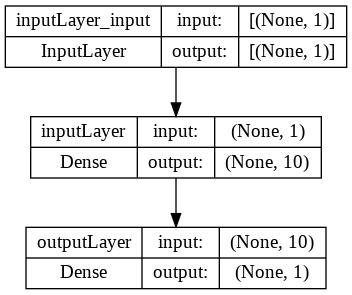

In [28]:
plot_model(model = model, show_shapes=True)

In [29]:
y_pred = model.predict(y_test)

1/1 [==============================] - 0s 42ms/step


In [30]:
X = tf.range(-100, 100, 4)
Y = X+10

# Splitting the data into training and test sets
X_train = X[:40]
y_train = Y[:40]

X_test = X[40:]
y_test = Y[40:]

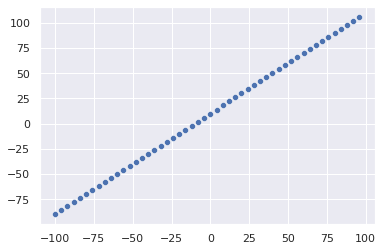

In [31]:
sns.scatterplot(x=X, y=Y)

In [32]:
X[0], Y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [33]:
# Setting seed for constant result
tf.random.set_seed(42)

In [34]:

# Let's rebuild the model
model = tf.keras.Sequential(
[ 
    tf.keras.layers.Dense(10, input_shape=[1], name="inputLayer"),
    tf.keras.layers.Dense(1, name="outputLayer")
], name= "Test_model"
)

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

model.fit(tf.expand_dims(X_train, axis=-1), tf.expand_dims(y_train, axis=-1), epochs=100, verbose=0)

In [35]:
model.summary();

Model: "Test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Dense)          (None, 10)                20        
                                                                 
 outputLayer (Dense)         (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [36]:
plot_model(model = model, show_dtype=True, show_shapes=True);

In [37]:
y_pred = model.predict(X_test)
print(y_pred)

1/1 [==============================] - 0s 37ms/step
[[ 70.552185]
 [ 75.13991 ]
 [ 79.72764 ]
 [ 84.315346]
 [ 88.90308 ]
 [ 93.49081 ]
 [ 98.07852 ]
 [102.666245]
 [107.253975]
 [111.84169 ]]


In [38]:
# Compare y_pred values with y_test
print(y_test)

tf.Tensor([ 70  74  78  82  86  90  94  98 102 106], shape=(10,), dtype=int32)


## Visualize model's Prediction

In [39]:
# Let's create a plotting function
def plot_predictions(
                      train_data = X_train, train_labels = y_train,
                      test_data = X_test, test_labels = y_test,
                     predictions = y_pred ):
    """
        Plots training data, test data and compares predictions to ground truth labels.
    """

    plt.figure(figsize=(6,4),dpi=100)

    # plot training data in blue
    plt.scatter(x=train_data, y=train_labels, c='b', label='Training data')

    # plot testing data in green
    plt.scatter(x=test_data, y=test_labels, c='g', label='Testing data')

    # plot model's predictions in red
    plt.scatter(x=test_data, y=predictions, c='r', label='Predictions')

    plt.legend()

In [40]:
def model_plot(Model):
  return plot_model(model=Model, show_shapes=True, show_dtype=True) 

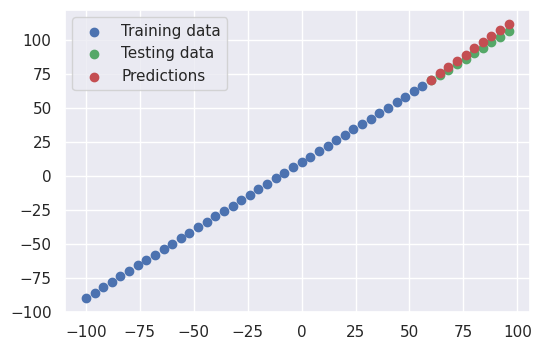

In [41]:
plot_predictions()

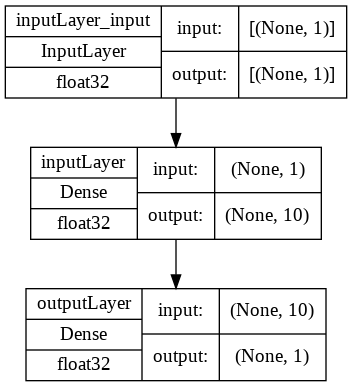

In [42]:
model_plot(model)

## Evaluvating model with regression metrics


Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics: 
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors" 

In [43]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 113ms/step - loss: 3.1969 - mae: 3.1969


[3.1969382762908936, 3.1969382762908936]

In [44]:
# Calculating mean absolute error
print( tf.metrics.mean_absolute_error(y_test, y_pred) )

tf.Tensor(
[17.558252  14.1160555 11.708944  10.336931  10.        10.698161
 12.447113  15.332995  19.253975  23.84169  ], shape=(10,), dtype=float32)


**It giving us the tensor of shape(10,)**

**But we need a scaler answer**

In [45]:
y_test.shape, y_pred.shape

(TensorShape([10]), (10, 1))

In [46]:
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred)) 
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

**Now both evaluate() and mae() answers are same**

In [47]:
#Calculate the mean squared error
mse = tf.keras.losses.mse(y_test, tf.squeeze(y_pred) )
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [48]:
# Make a function for errors
def mae(y_true, y_pred):
  return tf.keras.losses.mae(y_true, tf.squeeze(y_pred) )

def mse(y_true, y_pred):
  return tf.keras.losses.mse(y_true, tf.squeeze(y_pred) )  

## Running experiments



```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs 



**Build `model_1`**

In [49]:
# Set a random seed
tf.random.set_seed(42)

# Build a model
model_1 = tf.keras.Sequential(
    [tf.keras.layers.Dense(1)],
    name="model_1"
)

# Compile the model
model_1.compile( loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.SGD(),
                 metrics = ["mae"] )

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [50]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


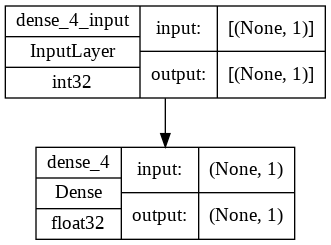

In [51]:
model_plot(model_1)

In [52]:
# Make and plot predictions
y_pred_1 = model_1.predict( tf.constant(X_test) ) 
y_pred_1

1/1 [==============================] - 0s 39ms/step


array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

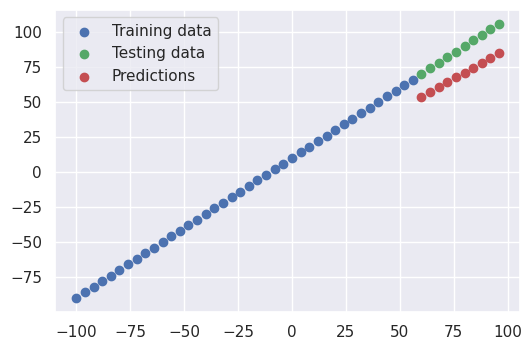

In [53]:
# Visulize
plot_predictions(predictions=y_pred_1)

In [54]:
# Calculate error
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1 

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [55]:
# Set a random seed
tf.random.set_seed(42)

# Build a model
model_2 = tf.keras.Sequential(
    [tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)],
    name="model_2"
)

# Compile the model
model_2.compile( loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.SGD(),
                 metrics = ["mse"] )

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mse: 1334.8953
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mse: 2586.0085
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/100
2/2 [=========================

In [56]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


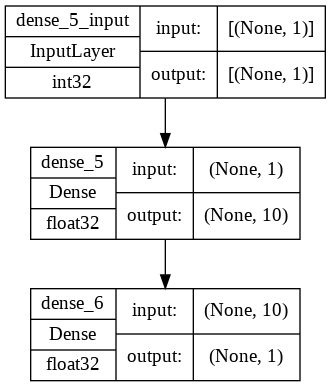

In [57]:
model_plot(model_2)

In [58]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

1/1 [==============================] - 0s 39ms/step


array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

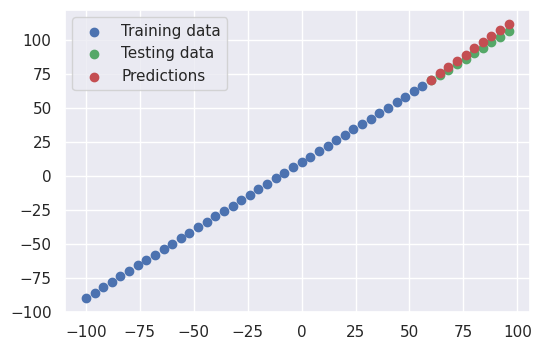

In [59]:
plot_predictions(predictions=y_pred_2)

In [60]:
# Calculate error
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2 

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

**Build `model_3`**

In [61]:
# Set a random seed
tf.random.set_seed(42)

# Build a model
model_3 = tf.keras.Sequential(
    [tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)],
    name="model_3"
)

# Compile the model
model_3.compile( loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.SGD(),
                 metrics = ["mae"] )

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=1)

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0s 4ms/

In [62]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


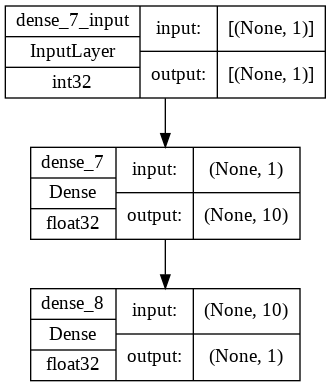

In [63]:
model_plot(model_3)

In [64]:
y_pred_3 = model_3.predict(X_test)
y_pred_3

1/1 [==============================] - 0s 80ms/step


array([[15.854746],
       [16.617332],
       [17.379921],
       [18.142508],
       [18.905096],
       [19.667683],
       [20.430271],
       [21.192858],
       [21.955446],
       [22.718035]], dtype=float32)

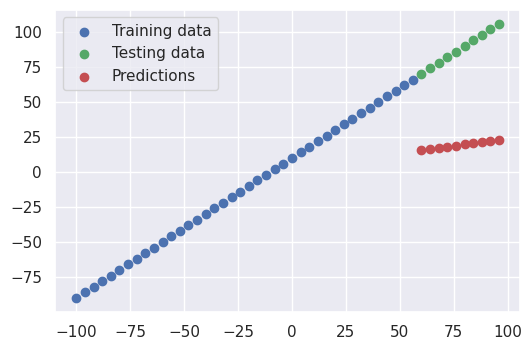

In [65]:
plot_predictions(predictions=y_pred_3) 

In [66]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

## Comparing the results of experiments

In [67]:
import pandas as pd 

In [68]:
Dict = [ [model_1.name, mae_1.numpy(), mse_1.numpy()],
         [model_2.name, mae_2.numpy(), mse_2.numpy()],
         [model_3.name, mae_3.numpy(), mse_3.numpy()]  ]

results = pd.DataFrame(data=Dict, columns=["model", "mae", "mse"])
results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


## Track your experiments

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* [TensorBoard](https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* [Weights & Biases](https://www.wandb.com/) - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Save & Load models


Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

### Saving model in both formats

In [69]:
# Using SavedModel format to save the model
model_2.save("model_2_SM")

In [70]:
#Using hdf5 format to save the model
model_2.save("model_2_hdf.h5")

### Loading the model in both formats

In [71]:
SM2 = tf.keras.models.load_model("/content/model_2_SM")

In [72]:
hfm2 = tf.keras.models.load_model("/content/model_2_hdf.h5")

### Comparing the models

In [73]:
SM2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Original model
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [75]:
sm2_y_pred = SM2.predict(X_test)
y_pred = model_2.predict(X_test)

1/1 [==============================] - 0s 32ms/step


In [76]:
print(sm2_y_pred)

[[ 70.552185]
 [ 75.13991 ]
 [ 79.72764 ]
 [ 84.315346]
 [ 88.90308 ]
 [ 93.49081 ]
 [ 98.07852 ]
 [102.666245]
 [107.253975]
 [111.84169 ]]


In [77]:
y_pred == sm2_y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# An Instance Set

In [79]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [80]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [81]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
